In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [2]:
df = pd.read_csv('datasets/vehicles_dataset_prepared.csv')

In [3]:
df.shape

(9619, 1463)

In [4]:
df.head()

,id,price,price_category,is_audi,is_ford,is_chevrolet,is_toyota,x0_diesel,x0_electric,x0_gas,...,long_std,year_std,odometer/price_std,desc_len_std,model_in_desc_std,model_len_std,model_word_count_std,month_std,dayofweek_std,diff_years_std
0,7308295377,54990,high,0,0,0,0,1.0,0.0,0.0,...,0.484245,1.322394,-0.510784,0.632075,-0.155788,1.163032,1.910669,-0.615846,1.120284,-1.322394
1,7316380095,16942,medium,0,1,0,0,0.0,0.0,0.0,...,1.110800,0.695973,-0.402947,-0.646781,-0.155788,0.932087,1.235799,1.623784,-1.374972,-0.695973
2,7313733749,35590,high,0,0,0,0,0.0,0.0,1.0,...,0.531185,0.852578,-0.514480,0.560744,-0.155788,0.470197,0.560930,-0.615846,-0.376870,-0.852578
3,7308210929,14500,medium,0,0,0,1,0.0,0.0,1.0,...,0.853562,0.226157,-0.241883,0.180435,-0.155788,-0.915473,-0.788810,-0.615846,1.120284,-0.226157
4,7303797340,14590,medium,0,0,0,0,0.0,0.0,0.0,...,0.557607,0.069552,-0.333074,0.766366,-0.155788,1.163032,1.910669,-0.615846,0.122182,-0.069552


In [5]:
df.price_category.value_counts()

medium    3220
low       3200
high      3199
Name: price_category, dtype: int64

Text(0.5, 1.0, 'Распределение стоимости автомобиля')

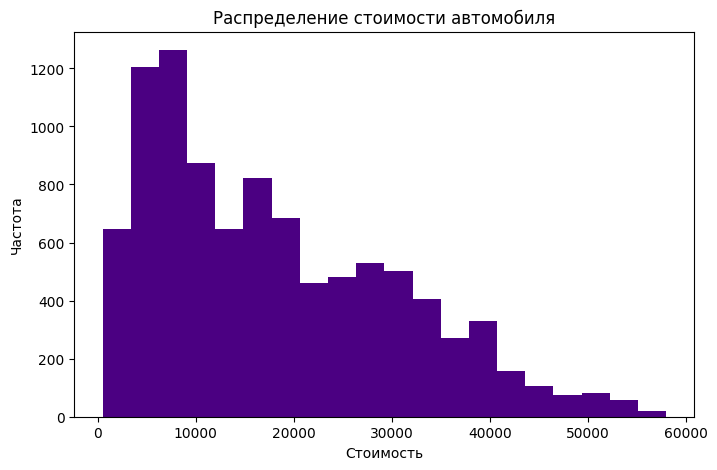

In [6]:
plt.figure(figsize=(8, 5))
plt.hist(df.price, color='indigo', bins=20)
plt.xlabel('Стоимость')
plt.ylabel('Частота')
plt.title('Распределение стоимости автомобиля')

In [7]:
df.columns

Index(['id', 'price', 'price_category', 'is_audi', 'is_ford', 'is_chevrolet',
       'is_toyota', 'x0_diesel', 'x0_electric', 'x0_gas',
       ...
       'long_std', 'year_std', 'odometer/price_std', 'desc_len_std',
       'model_in_desc_std', 'model_len_std', 'model_word_count_std',
       'month_std', 'dayofweek_std', 'diff_years_std'],
      dtype='object', length=1463)

In [8]:
df_prepared = df.copy()

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [12]:
X_train.shape, X_test.shape

((6733, 1462), (2886, 1462))

In [13]:
from sklearn.tree import DecisionTreeClassifier

In [14]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
predicted_train = clf.predict(X_train)
predicted_test = clf.predict(X_test)

In [16]:
predicted_train

array(['high', 'high', 'high', ..., 'medium', 'high', 'medium'],
      dtype=object)

In [17]:
predicted_test

array(['high', 'medium', 'low', ..., 'low', 'medium', 'low'], dtype=object)

In [18]:
from sklearn.metrics import accuracy_score

In [19]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.9996534996534997


In [20]:
df_prepared = df_prepared.drop(['price', 'odometer/price_std'], axis=1)

In [21]:
x = df_prepared.drop(['price_category'], axis=1)
y = df_prepared['price_category']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [23]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
predicted_train = clf.predict(X_train)
predicted_test = clf.predict(X_test)

In [25]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

1.0
0.6798336798336798


In [26]:
clf.feature_importances_

array([0.0318451 , 0.00041354, 0.00293381, ..., 0.00249545, 0.01327963,
       0.04351   ])

In [27]:
f_imp_list = list(zip(X_train.columns, clf.feature_importances_))

In [28]:
f_imp_list

[('id', 0.031845097947522195),
 ('is_audi', 0.0004135369574176561),
 ('is_ford', 0.0029338116463065015),
 ('is_chevrolet', 0.002438952675080943),
 ('is_toyota', 0.0015343405901690602),
 ('x0_diesel', 0.033097961449185156),
 ('x0_electric', 0.0010483868385354183),
 ('x0_gas', 0.0026296478141687395),
 ('x0_hybrid', 0.0020047138234906207),
 ('x0_other', 0.0010208447469462424),
 ('std_scaled_odometer', 0.07956636746576518),
 ('short_model_-benz', 0.0),
 ('short_model_1', 0.0),
 ('short_model_124', 0.0),
 ('short_model_128i', 0.0),
 ('short_model_135i', 0.0),
 ('short_model_1500', 0.0007374811437909025),
 ('short_model_163869', 0.0),
 ('short_model_1928', 0.0),
 ('short_model_1951', 0.0),
 ('short_model_1954', 0.0),
 ('short_model_1960s', 0.0),
 ('short_model_1966', 0.0),
 ('short_model_1968', 0.0003883228115080978),
 ('short_model_1972', 0.0),
 ('short_model_1977', 0.0),
 ('short_model_1978', 0.0),
 ('short_model_198.5', 0.0),
 ('short_model_1988', 0.0),
 ('short_model_1994', 0.0),
 ('shor

In [29]:
f_imp_list.sort(key = lambda x: x[1], reverse=True)

In [30]:
f_imp_list

[('year_std', 0.19991125643987817),
 ('model_len_std', 0.08038798855656777),
 ('std_scaled_odometer', 0.07956636746576518),
 ('desc_len_std', 0.06829752178818954),
 ('diff_years_std', 0.04350999918684073),
 ('lat_std', 0.04257045972916836),
 ('long_std', 0.035414927753611374),
 ('x0_diesel', 0.033097961449185156),
 ('id', 0.031845097947522195),
 ('dayofweek_std', 0.013279631759706752),
 ('manufacturer_kia', 0.009745662900265037),
 ('short_model_wrangler', 0.009201623910950966),
 ('manufacturer_ram', 0.008344233459158011),
 ('short_model_f-150', 0.006112665483013556),
 ('manufacturer_hyundai', 0.005663759938057568),
 ('model_in_desc_std', 0.0052723071678370025),
 ('short_model_silverado', 0.004930266479636602),
 ('short_model_Scion', 0.004865746378858322),
 ('manufacturer_chevrolet', 0.004644562423348874),
 ('manufacturer_gmc', 0.004595370374224667),
 ('manufacturer_mercedes-benz', 0.004590363002455255),
 ('short_model_tacoma', 0.004187781859111743),
 ('manufacturer_dodge', 0.0038422895

In [31]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [32]:
clf2 = DecisionTreeClassifier(random_state=42, max_depth=15, min_samples_split=15)
clf2.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=15, min_samples_split=15, random_state=42)

In [33]:
predicted_train = clf2.predict(X_train)
predicted_test = clf2.predict(X_test)

In [34]:
print(accuracy_score(y_train, predicted_train))
print(accuracy_score(y_test, predicted_test))

0.8529630179711867
0.6756756756756757


In [35]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, shuffle=True)

In [36]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [43]:
predicted_test = clf.predict(X_test)
predicted_test2 = clf2.predict(X_test)

In [44]:
print(accuracy_score(y_test, predicted_test))
print(accuracy_score(y_test, predicted_test2))

0.6933471933471933
0.7920997920997921


In [48]:
acc_list, acc_list2 = [], []

for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, shuffle=True)
    
    clf.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    
    predicted_test = clf.predict(X_test)
    predicted_test2 = clf2.predict(X_test)
            
    acc_list.append(accuracy_score(y_test, predicted_test))
    acc_list2.append(accuracy_score(y_test, predicted_test2))

In [49]:
import numpy as np

In [50]:
np.mean(acc_list), np.std(acc_list)

(0.6824047124047123, 0.008634491073184203)

In [51]:
np.mean(acc_list2), np.std(acc_list2)

(0.6834788634788634, 0.008551257894926929)

# Random Forest

In [52]:
from sklearn.ensemble import RandomForestClassifier

In [53]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

In [54]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [55]:
predicted_train_rf = rf_clf.predict(X_train)
predicted_test_rf = rf_clf.predict(X_test)

In [57]:
print(accuracy_score(y_train, predicted_train_rf))
print(accuracy_score(y_test, predicted_test_rf))

1.0
0.7501732501732502
